# Práctica 2

## Ejercicio1

In [1]:
import nltk
nltk.download('cess_esp')
from nltk.corpus import cess_esp # Descargar corpus
corpus_sentences = cess_esp.tagged_sents() # Lista de listas del corpus
number_sentences=len(corpus_sentences)
print('number sentences:', number_sentences)
print('number words:', end=" ")
nw = 0
for s in range(len(corpus_sentences)):
  nw= nw + len(corpus_sentences[s])
print(nw)
print('')

[nltk_data] Downloading package cess_esp to /root/nltk_data...
[nltk_data]   Unzipping corpora/cess_esp.zip.
number sentences: 6030
number words: 192685



In [2]:
# Procesar corpus y simplificar las categorías
corpus_limpio = []
for lista in corpus_sentences: # lista de listas de tuplas
  # enumerate(lista) en la cabecera del for tenemos el indice de 0 a n y la tupla, que es lo que hay en la lista
  indexBorrar = []
  for index, tupla in enumerate(lista): # lista de listas de tuplas, dentro de cada tupla, lo primero es la palabra seguido de la categoría
    palabra, categoria = tupla # Python acutomaticamente asigna el primer elemento de la tupla a palabra, y el segundo a categoria
    if palabra == '*0*': # Eliminar estas palabras del corpus
      indexBorrar.append(index) # Guardo los índices a borrar para borrarlos luego de forma segura
      continue
    elif len(categoria) == 1: # Las categorías de longitud 1 no se tocan
      continue
    elif categoria.startswith('v') or categoria.startswith('F'): # verbos y signos de puntuación conservan 3 primeras letras
      tupla = (palabra, categoria[:3])
    else: # El resto, 2 primeras letras
      tupla = (palabra, categoria[:2])
    lista[index] = tupla
  for x in sorted(indexBorrar, reverse=True): # Borramos las palabras en los índices seleccionados
    del lista[x]
  #print(lista)
  corpus_limpio.append(lista)

In [3]:
# Dividir conjuntos de entrenamiento de test
indice = int(len(corpus_limpio)*0.9) # índice donde se corta el 90% para entrenamiento, resto a test
entrenamiento = corpus_limpio[:indice]
test = corpus_limpio[indice:]

## Ejercicio 2

In [4]:
# Entrenar, evaluar y etiquetar con HMM
from nltk.tag import hmm
tagger_hmm = hmm.HiddenMarkovModelTagger.train(entrenamiento)
print(tagger_hmm.evaluate(test))
unafrase = []
for palabra,categoria in test[0]:
  unafrase.append(palabra)
etiquetas = tagger_hmm.tag(unafrase)
for palabra,categoria in etiquetas:
    print(palabra,categoria)

0.8784427571832664
Y cc
al_final rg
le pp
pedía vmi
que cs
colabore vai
conmigo vmp
en sp
la da
campaña nc
electoral aq
vasca aq
- Fg
. Fp


In [5]:
# Entrenar, evaluar y etiquetar con TNT
from nltk.tag import tnt
tagger_tnt = tnt.TnT()        
tagger_tnt.train(entrenamiento)
print(tagger_tnt.evaluate(test))
otraFrase = []
for palabra,categoria in test[1]:
  otraFrase.append(palabra)
etiquetas = tagger_tnt.tag(otraFrase)
for palabra,categoria in etiquetas:
    print(palabra,categoria)

0.8255173440524044
Jáuregui np
entiende vmi
que cs
Corcuera np
tiene vmi
motivos nc
para sp
estar vmn
deprimido aq
: Fd
- Fg
A sp
finales nc
del sp
93 Z
estaba vmi
en sp
la da
cresta Unk
de sp
la da
ola nc
, Fc
muy rg
feliz aq
incluso rg
por sp
su dp
dimisión nc
. Fp


## Ejercicio 3

In [ ]:
# Sin barajar HMM Cross validation
tamaño = int(len(corpus_limpio)/10)
resultados = []
for i in range(10):
  entrenamiento = corpus_limpio[:tamaño*i] + corpus_limpio[tamaño*i + tamaño:]
  test = corpus_limpio[tamaño*i: tamaño*i + tamaño]
  tagger_hmm = hmm.HiddenMarkovModelTagger.train(entrenamiento)
  resultados.append(tagger_hmm.evaluate(test))
print(resultados) 

[0.9283174828904097, 0.9237111533931321, 0.9228301472203911, 0.9251465103889185, 0.9228631913204551, 0.8781806196440343, 0.887891425743974, 0.8913107511045656, 0.8911650954798163, 0.8784427571832664]


In [ ]:
# Sin barajar TnT Cross validation
tamaño = int(len(corpus_limpio)/10)
resultados2 = []
for i in range(10):
  entrenamiento = corpus_limpio[:tamaño*i] + corpus_limpio[tamaño*i + tamaño:]
  test = corpus_limpio[tamaño*i: tamaño*i + tamaño]
  tagger_tnt = tnt.TnT()
  tagger_tnt.train(entrenamiento)
  resultados2.append(tagger_tnt.evaluate(test))
print(resultados2) 

[0.8963203270820371, 0.8886019751744133, 0.8864864864864865, 0.88949564908542, 0.8928287906853665, 0.8389584706657878, 0.8583445253410618, 0.8506627393225331, 0.8591370558375635, 0.8255173440524044]


In [ ]:
# Barajando HMM Cross validation
from random import shuffle
from copy import copy
barajado = copy(corpus_limpio)
barajar = shuffle(barajado)
tamaño = int(len(corpus_limpio)/10)
resultados3 = []
for i in range(10):
  entrenamiento = barajado[:tamaño*i] + barajado[tamaño*i + tamaño:]
  test = barajado[tamaño*i: tamaño*i + tamaño]
  tagger_hmm = hmm.HiddenMarkovModelTagger.train(entrenamiento)
  resultados3.append(tagger_hmm.evaluate(test))
print(resultados3) 

[0.9243237498007121, 0.9240394140034409, 0.9264510185279967, 0.9214599967410787, 0.9231119429409682, 0.927728929873472, 0.9279766410727803, 0.9263038548752834, 0.9265912381360931, 0.9275439531166756]


In [ ]:
# Barajando TnT Cross validation
from random import shuffle
from copy import copy
barajado = copy(corpus_limpio)
barajar = shuffle(barajado)
tamaño = int(len(corpus_limpio)/10)
resultados4 = []
for i in range(10):
  entrenamiento = barajado[:tamaño*i] + barajado[tamaño*i + tamaño:]
  test = barajado[tamaño*i: tamaño*i + tamaño]
  tagger_tnt = tnt.TnT()
  tagger_tnt.train(entrenamiento)
  resultados4.append(tagger_tnt.evaluate(test))
print(resultados4) 

[0.9035510305438291, 0.898529256163369, 0.9030937699340846, 0.9039995658544527, 0.8998747071961649, 0.9025643771079822, 0.8971742543171115, 0.9019805660277173, 0.90056134723336, 0.9076049461338428]


## Ejercicio 4

In [ ]:
# 95% de confianza, sabiendo que son proporciones
import math
def calcularErrores(x):
  errores = [None] * len(x)
  for i in range(len(x)):
    errores[i] = 1.96*math.sqrt(x[i]*(1-x[i]) /tamaño) 
  return errores

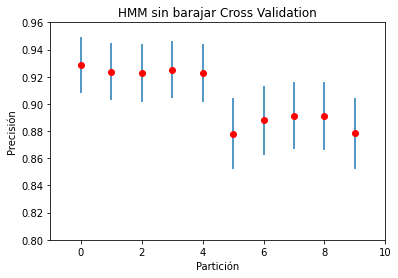

In [ ]:
# Sin barajar HMM Cross validation
import matplotlib.pyplot as plt
import statistics
x = [i for i in range(10)]
y = resultados
errores = calcularErrores(y)
plt.axis([-1, 10, 0.80, 0.96])
plt.ylabel('Precisión')
plt.xlabel('Partición')
plt.title('HMM sin barajar Cross Validation')
plt.plot(x,y,'ro')
plt.errorbar(x,y,yerr=errores,linestyle='None')
plt.show()


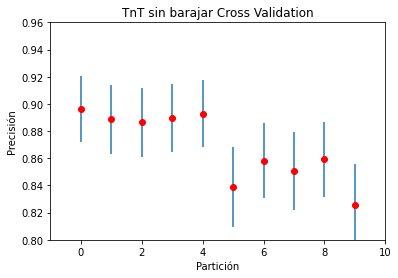

In [ ]:
# Sin barajar TnT Cross validation
import matplotlib.pyplot as plt
import statistics
x = [i for i in range(10)]
y = resultados2
errores = calcularErrores(y)
plt.axis([-1, 10, 0.80, 0.96])
plt.ylabel('Precisión')
plt.xlabel('Partición')
plt.title('TnT sin barajar Cross Validation')
plt.plot(x,y,'ro')
plt.errorbar(x,y,yerr=errores,linestyle='None')
plt.show()

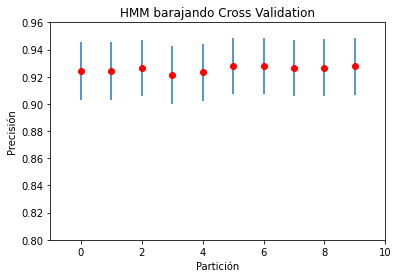

In [ ]:
# Barajando HMM Cross validation
import matplotlib.pyplot as plt
import statistics
x = [i for i in range(10)]
y = resultados3
errores = calcularErrores(y)
plt.axis([-1, 10, 0.80, 0.96])
plt.ylabel('Precisión')
plt.xlabel('Partición')
plt.title('HMM barajando Cross Validation')
plt.plot(x,y,'ro')
plt.errorbar(x,y,yerr=errores,linestyle='None')
plt.show()

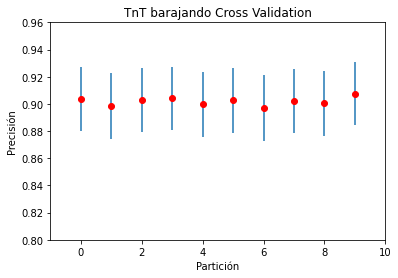

In [ ]:
# Barajando TnT Cross validation
import matplotlib.pyplot as plt
import statistics
x = [i for i in range(10)]
y = resultados4
errores = calcularErrores(y)
plt.axis([-1, 10, 0.80, 0.96])
plt.ylabel('Precisión')
plt.xlabel('Partición')
plt.title('TnT barajando Cross Validation')
plt.plot(x,y,'ro')
plt.errorbar(x,y,yerr=errores,linestyle='None')
plt.show()

In [ ]:
import statsmodels.stats.api as sms
import statistics
print('HMM sin barajar - media', statistics.mean(resultados),sms.DescrStatsW(resultados).tconfint_mean())
print('TnT sin barajar - media', statistics.mean(resultados2),sms.DescrStatsW(resultados2).tconfint_mean())
print('HMM barajando - media', statistics.mean(resultados3),sms.DescrStatsW(resultados3).tconfint_mean())
print('TnT barajando - media', statistics.mean(resultados4),sms.DescrStatsW(resultados4).tconfint_mean())

HMM sin barajar - media 0.9049859134368963 (0.8898432165897904, 0.9201286102840024)
TnT sin barajar - media 0.8686353363733074 (0.850532935274463, 0.8867377374721519)
HMM barajando - media 0.9255530739088501 (0.9239797549638727, 0.9271263928538275)
TnT barajando - media 0.9018933820511914 (0.8997454387898249, 0.9040413253125577)
